In [115]:
import torch
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score

In [116]:
SIZE: tuple = (128, 128)
ROOT_TEST: str = './data/test'
ROOT_TRAIN: str = './data/train'

transforms = transforms.Compose([
    transforms.Resize(SIZE),
    transforms.ToTensor()
])

train_folder = datasets.ImageFolder(root=ROOT_TRAIN, transform=transforms)
test_folder = datasets.ImageFolder(root=ROOT_TEST, transform=transforms)

In [117]:
train_loader = DataLoader(train_folder, batch_size=64, shuffle=True)
test_loader = DataLoader(test_folder, shuffle=False)

In [118]:
def draw_img(img: np.ndarray):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    if img.shape[0] <= 3:
        ax.imshow(np.swapaxes(img, 0, 2))
    else:
        ax.imshow(img)
    plt.show()

In [119]:
class AutoencoderAnomaly(nn.Module):
    def __init__(self):
        super(AutoencoderAnomaly, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),
            nn.Conv2d(16, 4, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d((2, 2))
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 16, 2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 2, stride=2),
            nn.Sigmoid()
        )
    
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        X = self.encoder(X)
        return self.decoder(X)

In [120]:
def train_model(epochs, model, criterion, optimizer):
    for epoch in range(epochs):
        loss_batch = 0
        for sample, _ in train_loader:
            pred = model(sample)
            loss = criterion(pred, sample)
            loss_batch += loss.detach()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'{epoch}) Loss: {loss_batch}')

In [121]:
model = AutoencoderAnomaly()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

In [122]:
train_model(50, model, criterion, optimizer)

0) Loss: 2.7768945693969727
1) Loss: 2.773282051086426
2) Loss: 2.769437313079834
3) Loss: 2.7651326656341553
4) Loss: 2.760310173034668
5) Loss: 2.7546396255493164
6) Loss: 2.7472212314605713
7) Loss: 2.737391471862793
8) Loss: 2.724660634994507
9) Loss: 2.7098681926727295
10) Loss: 2.6955394744873047
11) Loss: 2.6842665672302246
12) Loss: 2.6771397590637207
13) Loss: 2.671403408050537
14) Loss: 2.6643993854522705
15) Loss: 2.658352851867676
16) Loss: 2.6534981727600098
17) Loss: 2.6497273445129395
18) Loss: 2.6459977626800537
19) Loss: 2.643131732940674
20) Loss: 2.641004800796509
21) Loss: 2.639070510864258
22) Loss: 2.6373894214630127
23) Loss: 2.636362075805664
24) Loss: 2.6353845596313477
25) Loss: 2.634629487991333
26) Loss: 2.633758306503296
27) Loss: 2.6333062648773193
28) Loss: 2.6326823234558105
29) Loss: 2.632275342941284
30) Loss: 2.632141351699829
31) Loss: 2.6317856311798096
32) Loss: 2.631682872772217
33) Loss: 2.6314425468444824
34) Loss: 2.6312856674194336
35) Loss: 2

In [125]:
train_model(100, model, criterion, optimizer)

0) Loss: 2.630657434463501
1) Loss: 2.630586862564087
2) Loss: 2.630702495574951
3) Loss: 2.6305885314941406
4) Loss: 2.6306395530700684
5) Loss: 2.630746841430664
6) Loss: 2.6306209564208984
7) Loss: 2.630605697631836
8) Loss: 2.630537986755371
9) Loss: 2.6306400299072266
10) Loss: 2.630643844604492
11) Loss: 2.6305086612701416
12) Loss: 2.6304516792297363
13) Loss: 2.6304821968078613
14) Loss: 2.6305289268493652
15) Loss: 2.630631446838379
16) Loss: 2.6304914951324463
17) Loss: 2.6307032108306885
18) Loss: 2.6304140090942383
19) Loss: 2.630546808242798
20) Loss: 2.6304256916046143
21) Loss: 2.630448818206787
22) Loss: 2.6304619312286377
23) Loss: 2.6304049491882324
24) Loss: 2.630359649658203
25) Loss: 2.630424976348877
26) Loss: 2.630340576171875
27) Loss: 2.63027286529541
28) Loss: 2.6303701400756836
29) Loss: 2.6302361488342285
30) Loss: 2.6301581859588623
31) Loss: 2.6302249431610107
32) Loss: 2.630133867263794
33) Loss: 2.630181312561035
34) Loss: 2.6300034523010254
35) Loss: 2.

In [127]:
train_model(500, model, criterion, optimizer)

0) Loss: 2.627014636993408
1) Loss: 2.6270885467529297
2) Loss: 2.6268937587738037
3) Loss: 2.6268773078918457
4) Loss: 2.626683235168457
5) Loss: 2.6264703273773193
6) Loss: 2.6263158321380615
7) Loss: 2.6261937618255615
8) Loss: 2.6258773803710938
9) Loss: 2.6259920597076416
10) Loss: 2.6256332397460938
11) Loss: 2.625359535217285
12) Loss: 2.6250696182250977
13) Loss: 2.6246516704559326
14) Loss: 2.6246161460876465
15) Loss: 2.6243131160736084
16) Loss: 2.6240758895874023
17) Loss: 2.623504638671875
18) Loss: 2.62307071685791
19) Loss: 2.622715950012207
20) Loss: 2.622292995452881
21) Loss: 2.621829032897949
22) Loss: 2.621274471282959
23) Loss: 2.620908498764038
24) Loss: 2.620305061340332
25) Loss: 2.619925022125244
26) Loss: 2.6191539764404297
27) Loss: 2.6187610626220703
28) Loss: 2.6183371543884277
29) Loss: 2.6178038120269775
30) Loss: 2.617363452911377
31) Loss: 2.6169939041137695
32) Loss: 2.6166205406188965
33) Loss: 2.6163277626037598
34) Loss: 2.615891933441162
35) Loss: 

In [153]:
criterion2 = nn.MSELoss()
train_model(100, model, criterion2, optimizer)

0) Loss: 0.0038176551461219788
1) Loss: 0.0038187899626791477
2) Loss: 0.0038211180362850428
3) Loss: 0.0038201999850571156
4) Loss: 0.003821194637566805
5) Loss: 0.0038091291207820177
6) Loss: 0.003824851242825389
7) Loss: 0.0038094096817076206
8) Loss: 0.0038119805976748466
9) Loss: 0.00381387397646904
10) Loss: 0.0038117270451039076
11) Loss: 0.0038063875399529934
12) Loss: 0.003819655627012253
13) Loss: 0.003815714968368411
14) Loss: 0.003813754767179489
15) Loss: 0.003810954513028264
16) Loss: 0.003803413826972246
17) Loss: 0.0038173971697688103
18) Loss: 0.003818607423454523
19) Loss: 0.0038177981041371822
20) Loss: 0.0038093975745141506
21) Loss: 0.003812055103480816
22) Loss: 0.0038093063049018383
23) Loss: 0.00380346248857677
24) Loss: 0.0038065859116613865
25) Loss: 0.003817946882918477
26) Loss: 0.0038002505898475647
27) Loss: 0.0038152658380568027
28) Loss: 0.003810502588748932
29) Loss: 0.003810497000813484
30) Loss: 0.0038027004338800907
31) Loss: 0.003799157217144966
32)

In [156]:
with torch.inference_mode():
    preds_good = {x[0]: model(x[0]).numpy() for x, y in test_loader if y[0] == 2}
    preds_bad = {x[0]: model(x[0]).numpy() for x, y in test_loader if y[0] != 2}
    
    errors_good = np.array([criterion2(model(x[0]), x[0]) for x, y in test_loader if y[0] == 2])
    errors_bad = np.array([criterion2(model(x[0]), x[0]) for x, y in test_loader if y[0] != 2])

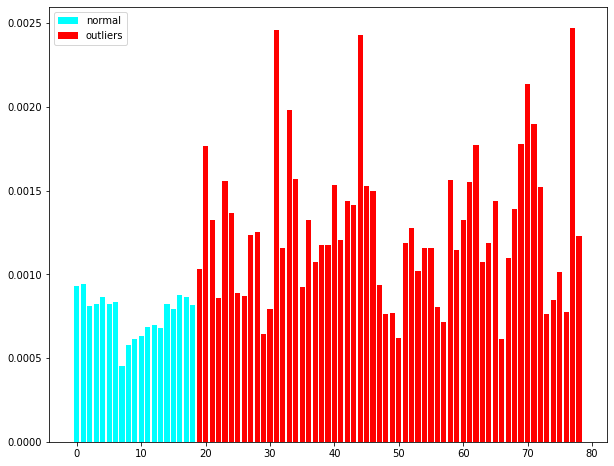

In [171]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)

ax.bar(np.arange(len(errors_good)), errors_good, color='cyan')
ax.bar(len(errors_good)+np.arange(len(errors_bad)), errors_bad, color='red')
ax.legend(['normal', 'outliers'])

plt.show()